In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import pdb
import sys

sys.path.append('..')

import random

random.seed(0)
np.random.seed(0)

## Generate synthetic data set

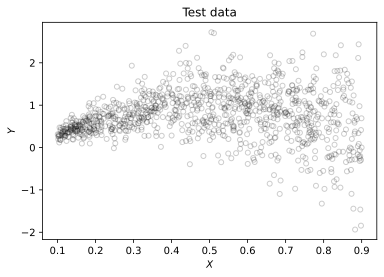

In [2]:
from simconfcal import models

np.random.seed(0)

data_model = models.DistributionDataModel() 

# Generate training samples
n_train = 2000
X_data, Y_data = data_model.sample(n_train)

# Generate calibration samples
n_cal = 10000
X_cal, Y_cal = data_model.sample(n_cal)

# Generate test samples
n_test = 1000
X_test, Y_test = data_model.sample(n_test)

# Plot data
from simconfcal.utils_plotting import plot_func, plot_func_est_cal

plot_func(X_test[:,0], Y_test, title="Test data")

## Estimate conditional distribution

In [3]:
from simconfcal.distribution import ConditionalDistribution

grid_quantiles = np.arange(0.01,1,0.01)
conddist = ConditionalDistribution(grid_quantiles, y_min=-10, y_max=10)

conddist.fit(X_data, Y_data, model="NNet")

Training with 2000 samples and 1 features.


Plot some estimated conditional quantiles

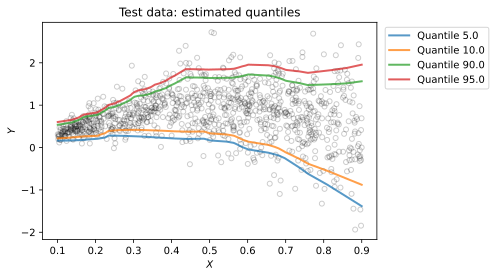

In [4]:
quantiles = np.array([5, 10, 90, 95])/100
quantile_labels = np.array([str(q*100) for q in quantiles]).squeeze()

est_Q_test = conddist.predict_quantiles(X_test, quantiles)

plot_func(X_test[:,0], Y_test, quantiles=est_Q_test, quantile_labels=quantile_labels, 
          title="Test data: estimated quantiles")

## Calibrate the estimated conditional distribution

In [5]:
conddist.calibrate_quantiles(X_cal, Y_cal, delta=0.05)

Point-wise calibration

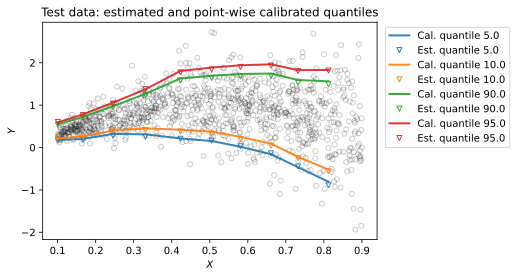

In [6]:
pointwise_Q_test = conddist.predict_calibrated_quantiles(X_test, quantiles, simultaneous=False)

plot_func_est_cal(X_test[:,0], Y_test,
                  quantiles_est = est_Q_test,
                  quantiles_calibrated = pointwise_Q_test,
                  quantile_labels = quantile_labels,
                  title="Test data: estimated and point-wise calibrated quantiles")

Simultaneous calibration

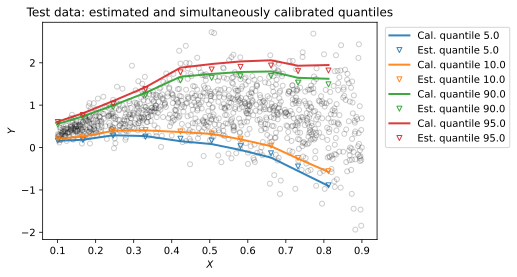

In [7]:
sim_Q_test = conddist.predict_calibrated_quantiles(X_test, quantiles, simultaneous=True)

plot_func_est_cal(X_test[:,0], Y_test,
                  quantiles_est = est_Q_test,
                  quantiles_calibrated = sim_Q_test,
                  quantile_labels = quantile_labels,
                  title="Test data: estimated and simultaneously calibrated quantiles")